# Hearbreak: Predicting Heart Failure with Clinical Data

## Planning
    "A goal without a plan is just a wish.” ― Antoine de Saint-Exupéry
### Goals:
    - Find drivers for death in a heart failure event
    - Build a classification model to predict death
### Methods:
    - Acquire data
    - Inspect and prep data
    - Conduct domain research 
    - Conduct thourough statistical analysis
    - Create visuals where necessary 
    - Scale data for model
    - Fit and validate a few models
    - Evaluate best model against test data
    - Create a prediction
    - Summarize results and future directions

In [1]:
#import math and data manipulation modules
import pandas as pd
import numpy as np
import scipy.stats as stats
from imblearn.over_sampling import SMOTE

# import viz modules
import matplotlib.pyplot as plt
import seaborn as sns

# import classification models
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# import custom modules
import evaluate, explore, prepare

import warnings
warnings.filterwarnings("ignore")

## Acquire
    “It is a capital mistake to theorize before one has data.” — Sherlock Holmes

In [2]:
heart_df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
heart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


### Acquire Takeaways:
- The dataset is already pretty cleaned up for us, indicated by a few things:
    1. The absence of nulls in the data set
    2. Platelets having a floating point number indicate that they were filled with an aggregate of some kind, since platelets are not measured in anything other than whole numbers
    3. Columns already have appropriate data types

- To Do:
    - Will need to scale data after the split
    - Explore potential feature engineering by binning platelet counts, ejection_fraction, or sodium

## Prepare
    “By failing to prepare, you are preparing to fail.”― Benjamin Franklin
Since the dataset is already pretty clean, I will just rename my target and change the platelets to an int

In [5]:
heart_df = prepare.prep_heart(heart_df)
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,died
0,75.0,0,582,0,20,1,265000,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000,2.7,116,0,0,8,1


Dataset is now ready for exploration

## Explore
      “The goal is to turn data into information and information into insight.” – Carly Fiorina

Lets make some hypothesis to guide exploration:
   1. Patients are more likely to die with a high platelet count
   2. Ejection fraction is how much blood volume is pushed out of the heart when it beats. Low ejection fraction is known to be an indicator of heart issues. Is a low ejection fraction predicative of death?
   3. Smoking is a known risk factor for cardiovascular disease. Is it also predicative of death?

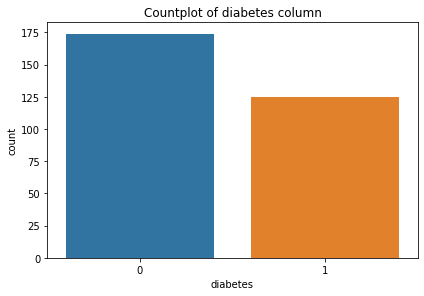

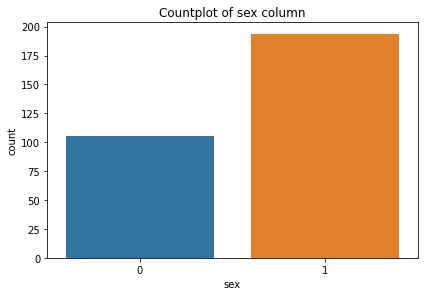

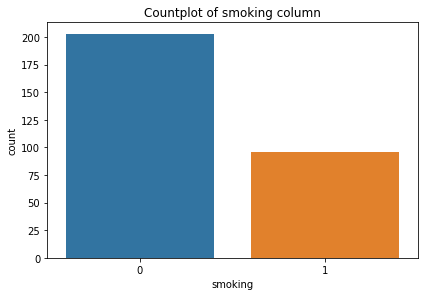

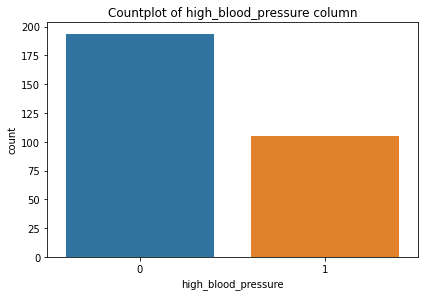

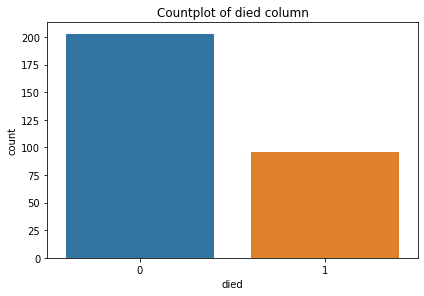

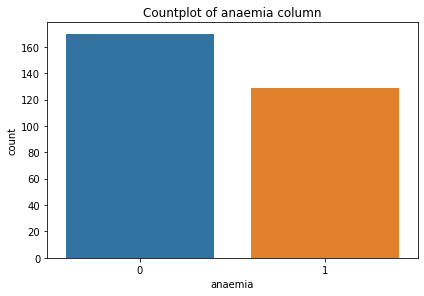

In [6]:
cat_vars = ['diabetes','sex','smoking','high_blood_pressure','died','anaemia']
explore.get_countplot(heart_df, cat_vars)

#### Qualitative Univariate Takeaways:
- Data is made up mostly of men
- Most people survived their cardiovascular event
- Data is mostly non-smokers
- Non-diabetics outnumber diabetics but only slightly
- Target variable is unbalanced and will need to be addressed before modeling

In [7]:
quant_vars = np.setdiff1d(list(heart_df.columns), cat_vars)

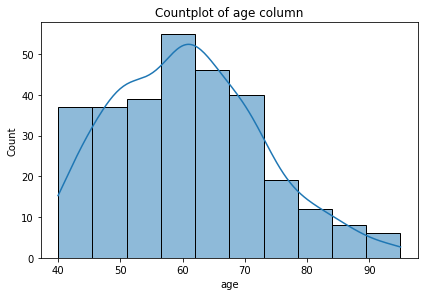

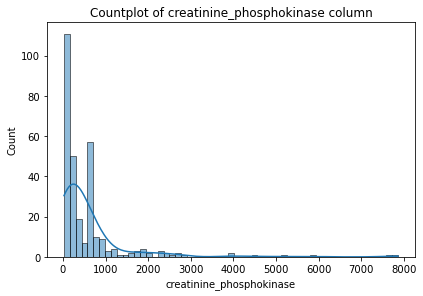

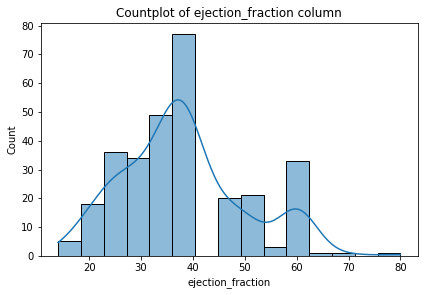

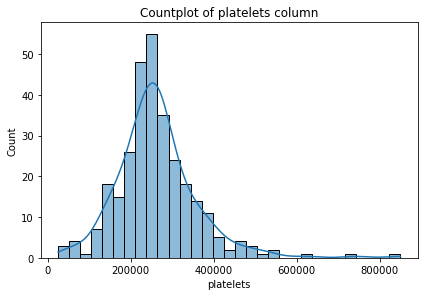

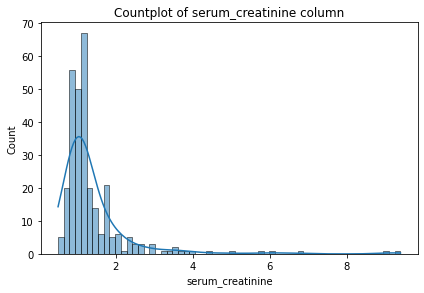

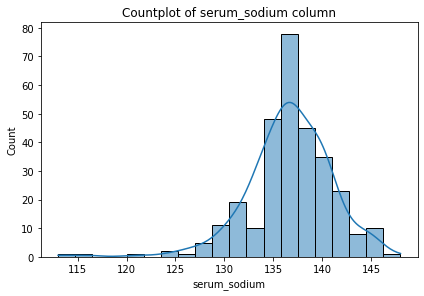

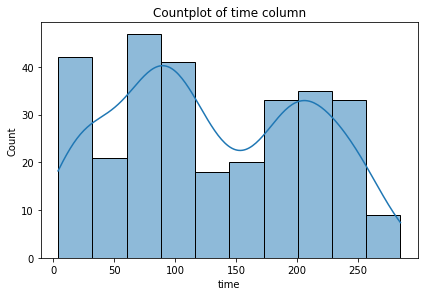

In [8]:
explore.get_dist(heart_df, quant_vars)

#### Quantitative Univariate Takeaway:
- For the most part, all the data is normally distributed, except for time and ejection fraction.
- The other datasets have a bell like curve but have some large values skewing it right.
- I would like to avoid dropping outliers because my dataset is small and also there is the reality that medical outliers do happen. 

### Bivariate 

In [9]:
# I need to split my data before I do multivariate analysis
train, validate, test = evaluate.train_validate_test_split(heart_df, 'died')

In [10]:
explore.run_chi2(train, cat_vars, 'died')

   chi2 for diabetes  p-value  degrees of freedom
0           0.001221  0.97212                   1
   chi2 for sex   p-value  degrees of freedom
0      0.646625  0.421322                   1
   chi2 for smoking   p-value  degrees of freedom
0          0.007819  0.929537                   1
   chi2 for high_blood_pressure   p-value  degrees of freedom
0                      1.141642  0.285306                   1
   chi2 for died       p-value  degrees of freedom
0     162.460803  3.281085e-37                   1
   chi2 for anaemia   p-value  degrees of freedom
0          0.723553  0.394981                   1


#### Qualitative Bivariate Exploration Takeaways:
- None of the categorical variables had significant results. The lowest p-value was for ```high_blood_pressure```. These results are surprising, I would have assumed a higher level of significance for at least smokers and high blood pressure. Perhaps I could feature engineer another categorical by binning some values. 
- We can reject our hypothesis that smoking is predicative of death

In [11]:
explore.mann_whitney(train, 'died', quant_vars)

Mann-whitney U for age : 2268.5, p = 0.007
Mann-whitney U for creatinine_phosphokinase : 2553.5, p = 0.088
Mann-whitney U for ejection_fraction : 4204.5, p = 0.000
Mann-whitney U for platelets : 3242.0, p = 0.514
Mann-whitney U for serum_creatinine : 2022.5, p = 0.000
Mann-whitney U for serum_sodium : 3631.5, p = 0.046
Mann-whitney U for time : 4925.5, p = 0.000


#### Quantitative Bivariate Exploration Takeaways:
- The only significant statistical results are ```serum_sodium```, ```serum_creatine```, ```ejection_fraction```, ```age```, and ```time```
    - I will not include time as a feature at this time because it is the days between the initial event and a follow-up visit. From my research into the dataset, the proper way to analyze this in a meaningful way is to perform a survival analysis on it. For the time being, I will wait to implement time as a feature
- ```ejection_fraction``` makes sense. Weaker or damaged hearts will not be able to evacuate the ventricles as efficiently. This leads to blood potentially clotting, oxygenation issues with the tissue, and increases stress on the heart. We are able to reject our null that ```ejection_fraction``` is not predicative of death
- ```age``` is also another one that makes sense, as older people tend to not recover from inuries as well as younger people
 - ```serum_sodium``` and ```serum_creatine``` are two other known biomarkers for cardiac health 

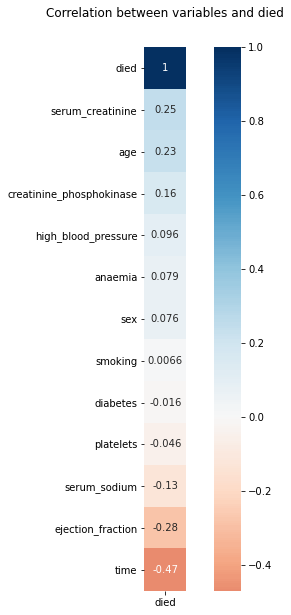

In [12]:
explore.get_heatmap(train, 'died')

### Multivariate

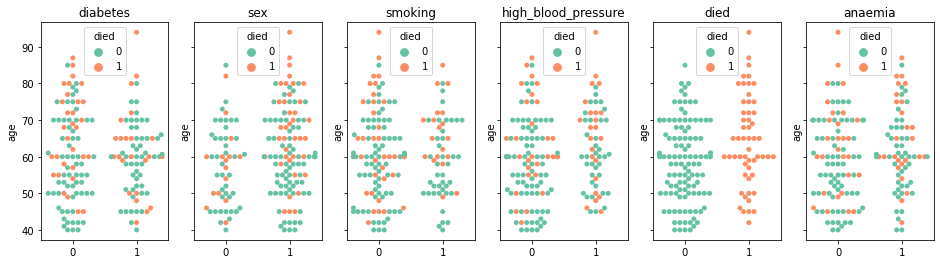

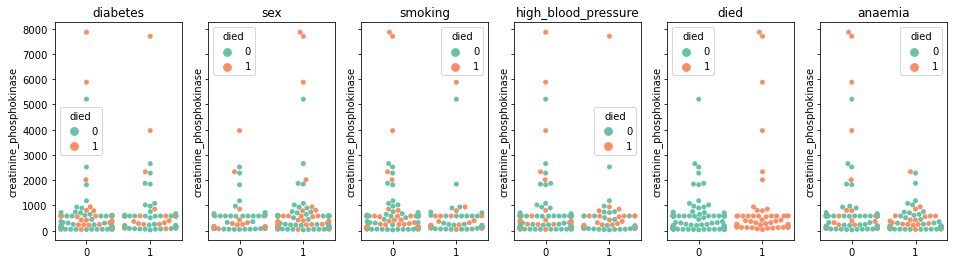

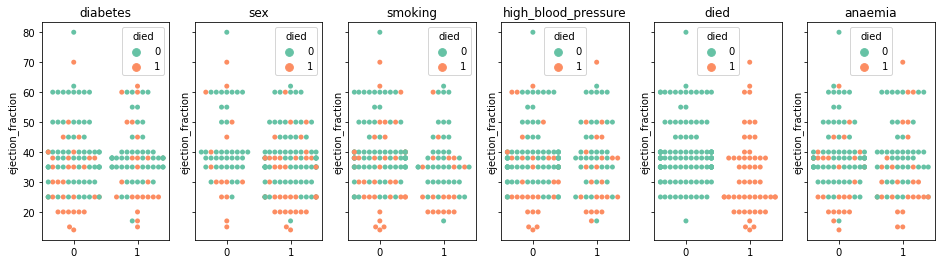

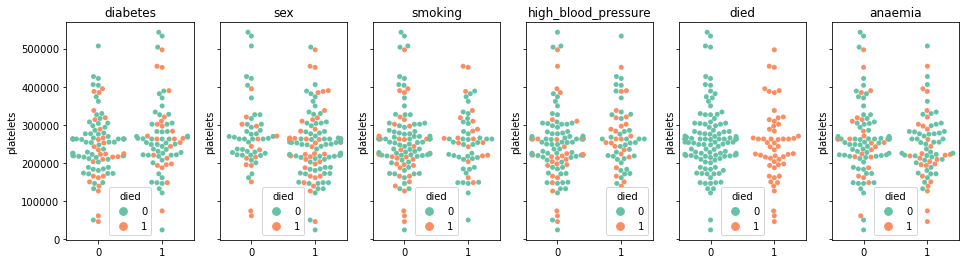

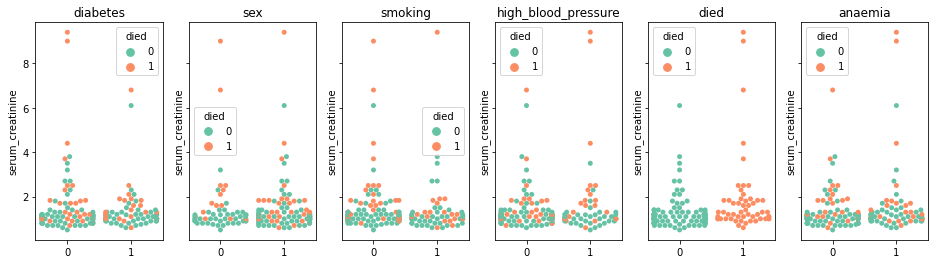

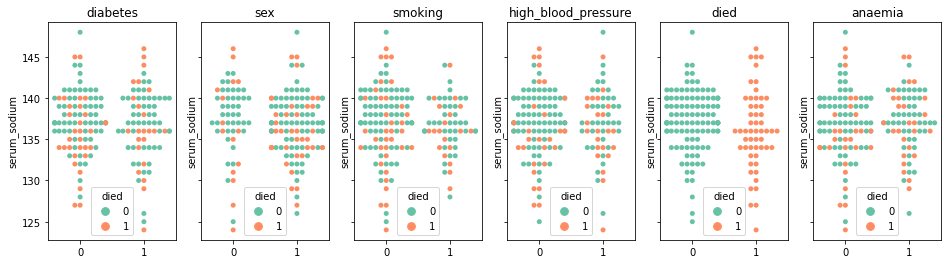

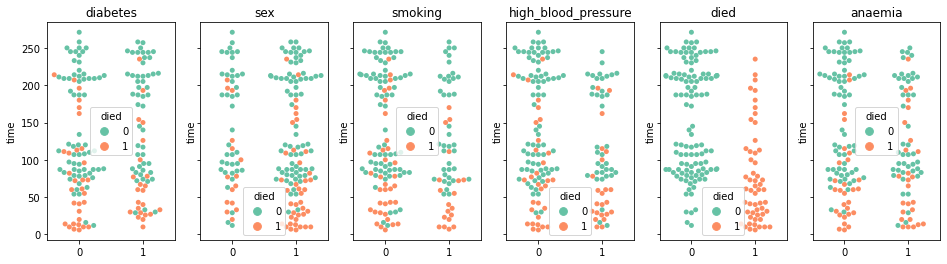

In [13]:
explore.plot_swarm_grid_with_color(train, 'died', cat_vars, quant_vars)

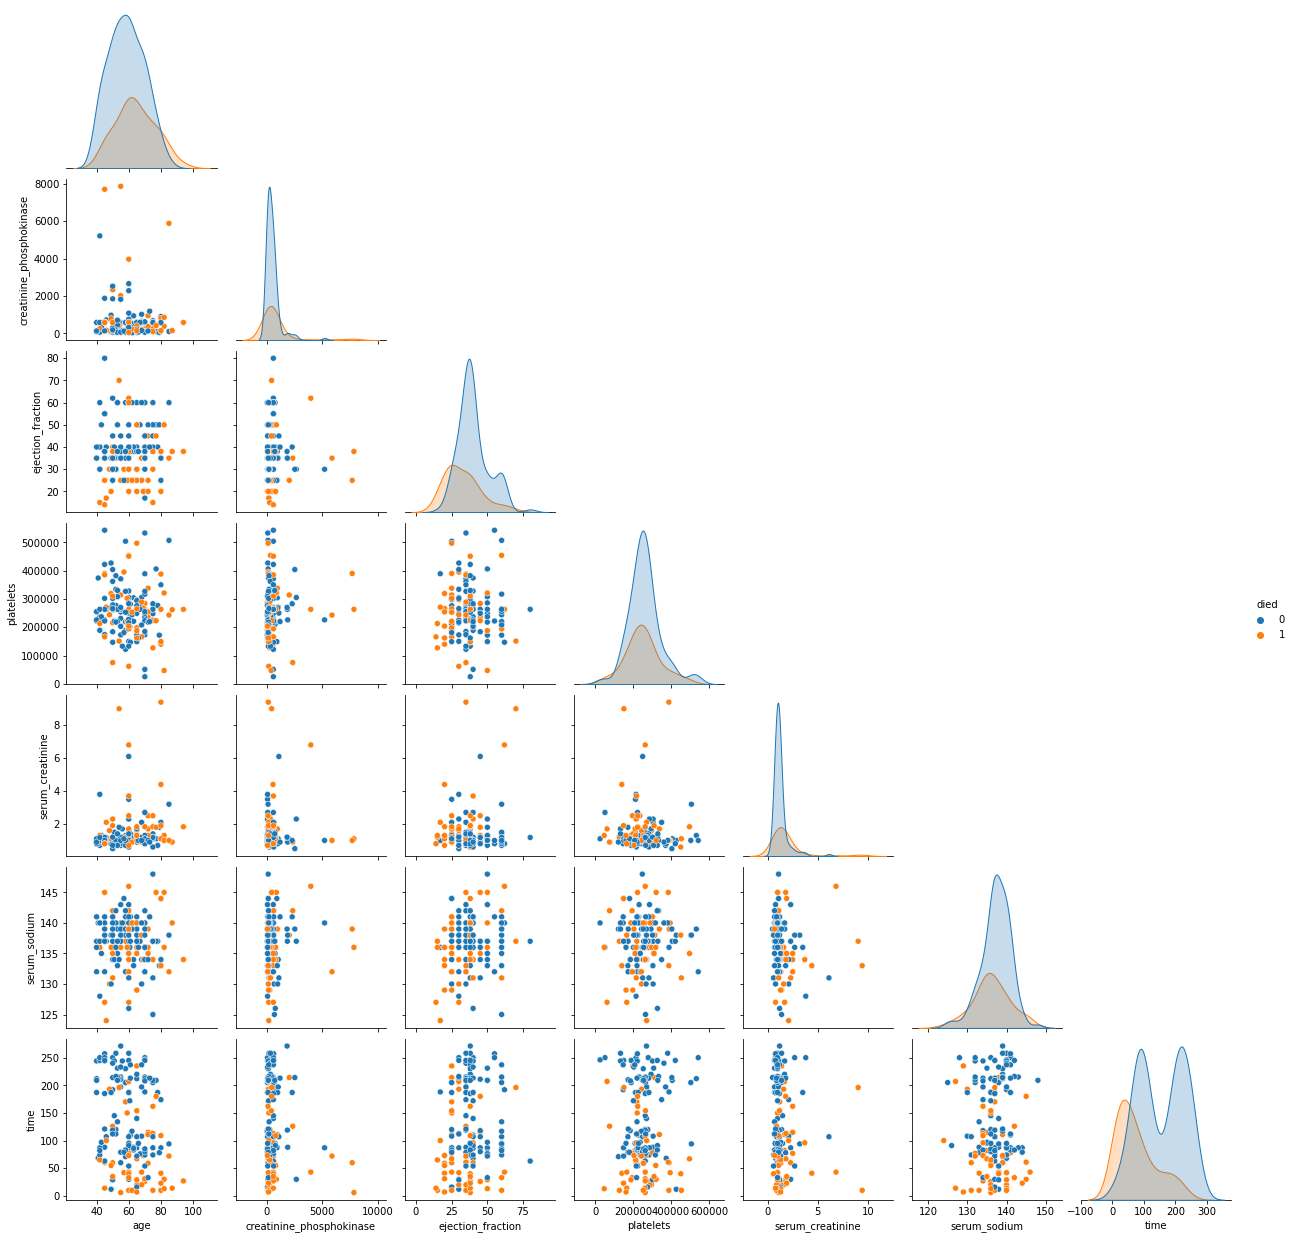

In [14]:
sns.pairplot(data=train, vars=quant_vars, hue='died', corner = True)

#### Multivariate takeaways:
   - I don't see any real clustering happening in the swarm plots, but men seemed to die more frequently at higher ages
   - You can see that extremely low ejection fractions pretty much are a deathspell. Further reason to bin that and maybe try to use it as a categorical variable. I could also try clustering it and seeing how strong it is.
   - The heatmap shows our top variables, further supporting what we learned from the statistical analysis

## Modeling
     “We classify things for the purpose of doing something to them. Any classification which does not assist manipulation is worse than useless.” ― Randolph Bourne.

### Model Choice
- I want to maximize true positive cases (predicted deaths that are observed deaths) and minimize false negative cases (predicted survival but observed death)
- A Decision Tree, Random Forest, K - Nearest Neighbors and a Logistic Regression model were fit to the train data set. KNN model was the only model that used scaled training data. 
- Random Forest performed the best out of the other four models
- Hyper-parameters were chosen to reduce overfitting, reduce false negative rates, and maximize true positive rates
- SMOTE was used to remedy the class imbalance

In [24]:
# first set the baseline
train['baseline'] = 0
baseline_accuracy = (train.baseline == train.died).mean()
print(f'Baseline accuracy is {baseline_accuracy:.2%}')

Baseline accuracy is 67.66%


In [25]:
# Split the data into X and y datasets
y_col = 'died'
X_cols = ['ejection_fraction','age','serum_sodium','serum_creatinine']
X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

To address the class imbalance, I will use the Synthetic Minority Oversampling TEchnique. 

In [26]:
smote = SMOTE(random_state = 123)
X_train1, y_train1 = smote.fit_sample(X_train, y_train)

In [27]:
rfc = RandomForestClassifier(random_state = 123,
                             max_depth = 3, 
                             min_samples_leaf = 16, 
                             ccp_alpha = .013,
                             class_weight = {0:.33, 1: .66})
rfc.fit(X_train1, y_train1)

RandomForestClassifier(ccp_alpha=0.013, class_weight={0: 0.33, 1: 0.66},
                       max_depth=3, min_samples_leaf=16, random_state=123)

In [28]:
evaluate.run_metrics(X_train1, y_train1, rfc, 'train')

train data set accuracy score: 72.12%
train data set precision score 66.89%
train data set recall score: 87.61%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.82      0.57      0.67       113
           1       0.67      0.88      0.76       113

    accuracy                           0.72       226
   macro avg       0.74      0.72      0.71       226
weighted avg       0.74      0.72      0.71       226

-------------------------------

confusion matrix
[[64 49]
 [14 99]]

train data set model metrics
---------------------------------
True positive rate for the model is 87.61%
False positive rate for the model is  43.36%
True negative rate for the model is 56.64%
False negative rate for the model is 12.39%



In [20]:
evaluate.run_metrics(X_validate, y_validate, rfc, 'validate')

validate data set accuracy score: 69.44%
validate data set precision score 51.28%
validate data set recall score: 86.96%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.91      0.61      0.73        49
           1       0.51      0.87      0.65        23

    accuracy                           0.69        72
   macro avg       0.71      0.74      0.69        72
weighted avg       0.78      0.69      0.70        72

-------------------------------

confusion matrix
[[30 19]
 [ 3 20]]

validate data set model metrics
---------------------------------
True positive rate for the model is 86.96%
False positive rate for the model is  38.78%
True negative rate for the model is 61.22%
False negative rate for the model is 13.04%



In [21]:
evaluate.run_metrics(X_test, y_test, rfc, 'test')

test data set accuracy score: 70.00%
test data set precision score 51.43%
test data set recall score: 94.74%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.96      0.59      0.73        41
           1       0.51      0.95      0.67        19

    accuracy                           0.70        60
   macro avg       0.74      0.77      0.70        60
weighted avg       0.82      0.70      0.71        60

-------------------------------

confusion matrix
[[24 17]
 [ 1 18]]

test data set model metrics
---------------------------------
True positive rate for the model is 94.74%
False positive rate for the model is  41.46%
True negative rate for the model is 58.54%
False negative rate for the model is 5.26%



#### Modeling Takeaways
- The Random Forest model ended up performing very well on the test data. It has a very low false negative rate and a high true positive
- Model isn't as strong at classifying non-fatal cases, but thats acceptable since the goal is to predict deaths and prevent them
- The model is sufficiently effective

In [22]:
heart_df['y_hat'] = rfc.predict(heart_df[X_cols])

In [23]:
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,died,y_hat
0,75.0,0,582,0,20,1,265000,1.9,130,1,0,4,1,1
1,55.0,0,7861,0,38,0,263358,1.1,136,1,0,6,1,0
2,65.0,0,146,0,20,0,162000,1.3,129,1,1,7,1,1
3,50.0,1,111,0,20,0,210000,1.9,137,1,0,7,1,1
4,65.0,1,160,1,20,0,327000,2.7,116,0,0,8,1,1


## Conclusions and Recommendations

#### Conclusions
- ```serum_sodium```, ```serum_creatine```, ```ejection_fraction```, and ```age``` were able to predict 98% of heart failure deaths using a random forest classifier model
- This model does have use in identifying patients who will die following heart failure. Physicians could use this model to identify cases that are higher risk for death, saving their time and providing a greater standard of care
- Data solutions in healthcare can be a powerful tool for physicians to leverage 

#### Recommendations
- Use this model to identify patients that will potentially die to more intelligently target care
- The model still has a high rate of identifying people as falsely dying, but that is still less costly than incorrectly classifying people as not dying when they actually do 
- Perform a survival analysis on the ```time``` data to hopefully reduce the amount of false positives. Healthcare in the United States is expensive and the false positives equate to a waste of physician time and patient money. While those are still not as "costly" as dying, an ideal model would not have such a high false positive rate
- Collect data on weight, resting heart rate, and blood pressure data to further improve on the model 